<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Project <br>
<font color=696880 size=4>
    Project Team 
    
    
____


# Introduction

In this project, we are going to have a brief and elementary hands-on real-world project, predicting breast cancer survival using machine learning models with clinical data and gene expression profiles.

# Data Documentation

For this purpose, we will use "Breast Cancer Gene Expression Profiles (METABRIC)" data. 
The first 31 columns of data contain clinical information including death status.
The next columns of the data contain gene's related information which includes both gene expressions and mutation information. (gene's mutation info columns have been marked with "_mut" at the end of the names of the columns) 
For more information please read the [data documentation](https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric).

# Data Preparation (15 Points)

In this section you must first split data into three datasets:
<br>
1- clinical dataset
<br>
2- gene expressions dataset
<br>
3- gene mutation dataset. (We will not use this dataset in further steps of the project)

## Data Loading & Splitting

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def suffix_remove(text, suffix='_mut'):
    check_last = suffix + '\n'
    if text[len(text)-len(suffix): len(text)] == suffix or \
        text[len(text)-len(check_last) : len(text)] == check_last:
        return ''
    else:
        return text

file_name = 'METABRIC_RNA_Mutation.csv'

with open (file_name, 'r') as file:
    headers = file.readline()
    headers = np.array([suffix_remove(head) for head in headers.split(',')])
    total_head_num = len(headers)
    headers = headers[np.nonzero(headers)]

dataset = np.loadtxt(file_name, delimiter=',', skiprows=1, dtype='U')

clinical_cols = np.arange(0, 31)
gene_expressions_cols = np.arange(31, len(headers))
gene_mutation_cols = np.arange(len(headers), total_head_num)
clinical_gen_cols = np.arange(0, len(headers))

clinical_dataset = dataset[:, clinical_cols]
gen_expressions_dataset = dataset[:, gene_expressions_cols]
gene_mutation_dataset = dataset[:, gene_mutation_cols]
clinical_gen_dataset = dataset[:, clinical_gen_cols]

clinical_header = headers[0: 31]
gene_expressions_header = headers[31: len(headers)]
clinical_gen_header = headers
categorical_features = ['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed',
'cellularity', 'pam50_+_claudin-low_subtype', 'er_status_measured_by_ihc', 'er_status', 
'neoplasm_histologic_grade', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype',
'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'oncotree_code',
'pr_status', '3-gene_classifier_subtype', 'death_from_cancer']



np.savetxt('clinical_dataset.csv', clinical_dataset, delimiter=',', fmt='%s')
np.savetxt('gen_expressions_dataset.csv', gen_expressions_dataset, delimiter=',', fmt='%s')
np.savetxt('gene_mutation_dataset.csv', gene_mutation_dataset, delimiter=',', fmt='%s')
np.savetxt('clinical_gen_dataset.csv', clinical_gen_dataset, delimiter=',', fmt='%s')

## EDA

For each dataset, you must perform a sufficient EDA.

In [66]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df_clinical_gen = pd.read_csv('clinical_gen_dataset.csv', names=clinical_gen_header)


df_clinical = df_clinical_gen.iloc[:, 0:31]
df_gen_expression = df_clinical_gen.iloc[:, 31:]

In [67]:
df_clinical.head(10)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,4.062,IDC,7.800000,0,Positive,1,ER+/HER2- High Prolif,31.0,4.0,Died of Disease
6,14,56.45,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.020,IDC,164.333333,1,Positive,1,NaN,10.0,2.0,Living
7,22,89.08,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,0,claudin-low,1.0,Positve,...,4.058,MDLC,99.533333,0,Negative,1,NaN,29.0,2.0,Died of Other Causes
8,28,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,5.032,IDC,36.566667,0,Negative,1,ER+/HER2- High Prolif,16.0,2.0,Died of Other Causes
9,35,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1.0,Negative,...,3.056,ILC,36.266667,0,Negative,0,ER+/HER2- High Prolif,28.0,2.0,Died of Disease


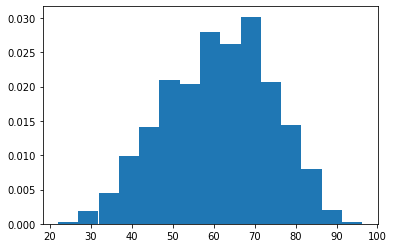

In [68]:
from matplotlib import pyplot as plt

plt.hist(df_clinical['age_at_diagnosis'], bins=15, density=True)
plt.show()

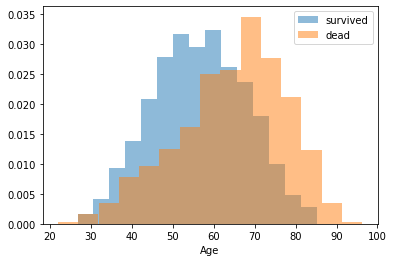

In [81]:
alives = df_clinical[df_clinical.overall_survival == 1]
deads = df_clinical[df_clinical.overall_survival == 0]

plt.hist(alives['age_at_diagnosis'], bins=15, density=True, label='survived', alpha=0.5)
plt.hist(deads['age_at_diagnosis'], bins=15, density=True, label='dead', alpha=0.5)
plt.legend()
plt.xlabel('Age')

plt.show()

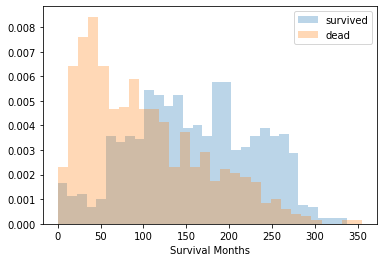

In [80]:
alives = df_clinical[df_clinical.overall_survival == 1]
deads = df_clinical[df_clinical.overall_survival == 0]

plt.hist(alives['overall_survival_months'], bins=30, density=True, label='survived', alpha=0.3)
plt.hist(deads['overall_survival_months'], bins=30, density=True, label='dead', alpha=0.3)
plt.legend()
plt.xlabel('Survival Months')

plt.show()

In [20]:
df_gen_expression.head()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


In [4]:
df_clinical.duplicated().sum()

0

In [5]:
df_gen_expression.duplicated().sum()

0

In [6]:
df_clinical_gen.duplicated().sum()

0

In [7]:
df_clinical.isnull().sum()

patient_id                          0
age_at_diagnosis                    0
type_of_breast_surgery             22
cancer_type                         0
cancer_type_detailed               15
cellularity                        54
chemotherapy                        0
pam50_+_claudin-low_subtype         0
cohort                              0
er_status_measured_by_ihc          30
er_status                           0
neoplasm_histologic_grade          72
her2_status_measured_by_snp6        0
her2_status                         0
tumor_other_histologic_subtype     15
hormone_therapy                     0
inferred_menopausal_state           0
integrative_cluster                 0
primary_tumor_laterality          106
lymph_nodes_examined_positive       0
mutation_count                     45
nottingham_prognostic_index         0
oncotree_code                      15
overall_survival_months             0
overall_survival                    0
pr_status                           0
radio_therap

In [8]:
df_gen_expression.isnull().sum()

brca1      0
brca2      0
palb2      0
pten       0
tp53       0
          ..
tnk2       0
tulp4      0
ugt2b15    0
ugt2b17    0
ugt2b7     0
Length: 489, dtype: int64

In [9]:
df_clinical_gen.isnull().sum()

patient_id                 0
age_at_diagnosis           0
type_of_breast_surgery    22
cancer_type                0
cancer_type_detailed      15
                          ..
tnk2                       0
tulp4                      0
ugt2b15                    0
ugt2b17                    0
ugt2b7                     0
Length: 520, dtype: int64

In [102]:
"""
Handling missing values.
"""

df_clinical_gen.dropna(inplace=True)
# df_clinical_gen.interpolate(method='linear', limit_direction='backward', inplace=True)
df_clinical = df_clinical_gen.iloc[:, 0:31]
df_gen_expression = df_clinical_gen.iloc[:, 31:]
df_clinical.index = [i for i in range(df_clinical.shape[0])]
df_gen_expression.index = [i for i in range(df_clinical.shape[0])]


In [103]:
"""
Handling categorical features in clinical dataset and removing target column and 'death_from_cancer'
from clinical dataframe.
"""
target_name = "overall_survival"
should_remove_name = "death_from_cancer"

target = df_clinical[target_name]

df_clinical.drop(columns=[should_remove_name], axis=1, inplace=True)
df_clinical.drop(columns=[target_name], axis=1, inplace=True)

categorical_features_info = {}
for feature in categorical_features:
    items = []
    for item in df_clinical_gen[feature].unique():
        if pd.notnull(item):
            items.append(item)
    categorical_features_info[feature] = items


encoder = OneHotEncoder(handle_unknown='ignore')
clinical_header_final = [feature for feature in clinical_header if (feature!=target_name and feature!=should_remove_name)]

def apply_onehotencoding(df, categorical_features_info):
    finad_df = pd.DataFrame()
    for feature in clinical_header_final:
        if feature in categorical_features_info.keys():
            encoder_df = pd.DataFrame(encoder.fit_transform(df[[feature]]).toarray())
            cols = [feature+':'+str(category) for category in categorical_features_info[feature]]
            encoder_df.columns = cols
            finad_df[cols] = encoder_df
        else:
            finad_df[feature] = df[[feature]]
    return finad_df
encoded_df_clinical = apply_onehotencoding(df_clinical, categorical_features_info)
encoded_df_clinical.to_csv('encoded_df_clinical.csv', index=False)

## Dimension Reduction (20 + Up to 10 Points Optional)

For each dataset, investigate whether it is needed to use a dimensionality reduction approach or not. If yes, please reduce the dataset's dimension. You can use UMAP for this purpose but any other approach is acceptable. Finding the most important features contains extra points.

In [106]:
from sklearn.decomposition import PCA
"""
Since most of the features in clinical dataset are categorical (the 18 out of 31) it is
not needed to apply dimensionality reduction on it. But for the gen expression dataset
we deal with many numeric features (489 features); thus a dimensionality reduction process
is required.
"""
n_features_gen = 30
n_features_tot = n_features_gen + 31
pca_reducer = PCA(n_components=n_features_gen)
df_reduced_gen_expression = pca_reducer.fit_transform(df_gen_expression)
df_reduced_gen_expression = pd.DataFrame(df_reduced_gen_expression)

df_reduced_encoded_clinical_gen = pd.concat([encoded_df_clinical, df_reduced_gen_expression], axis=1)


In [128]:
from sklearn.model_selection import train_test_split
def splitter(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    return X_train, X_test, y_train, y_test

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = splitter(df_reduced_gen_expression, target)
print(X_train_reduced.shape)
print(X_test_reduced.shape)
print(y_train_reduced.shape)
print(y_test_reduced.shape)

(873, 30)
(219, 30)
(873, 1)
(219, 1)


In [129]:
X_train_gene, X_test_gene, y_train_gene, y_test_gene = splitter(df_gen_expression, target)
print(X_train_gene.shape)
print(X_test_gene.shape)
print(y_train_gene.shape)
print(y_test_gene.shape)

(873, 489)
(219, 489)
(873, 1)
(219, 1)


In [130]:
X_train_clinical, X_test_clinical, y_train_clinical, y_test_clinical = splitter(encoded_df_clinical, target)
print(X_train_clinical.shape)
print(X_test_clinical.shape)
print(y_train_clinical.shape)
print(y_test_clinical.shape)

(873, 76)
(219, 76)
(873, 1)
(219, 1)


We use Information Gain In order to specify most important features

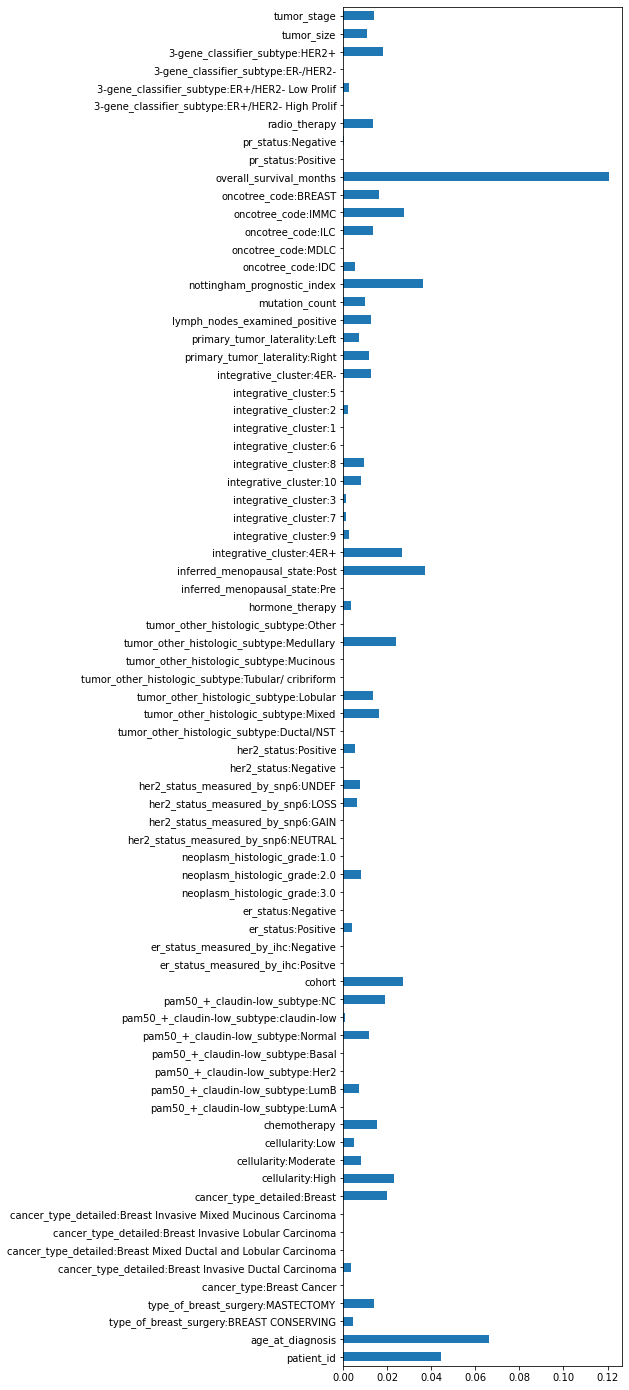

In [37]:
from sklearn.feature_selection import mutual_info_classif

# specify most important clinical features
plt.figure(figsize=(5, 25))
features_importance = mutual_info_classif(encoded_df_clinical, target)
pd.Series(features_importance, encoded_df_clinical.columns).plot(kind='barh')
plt.show()

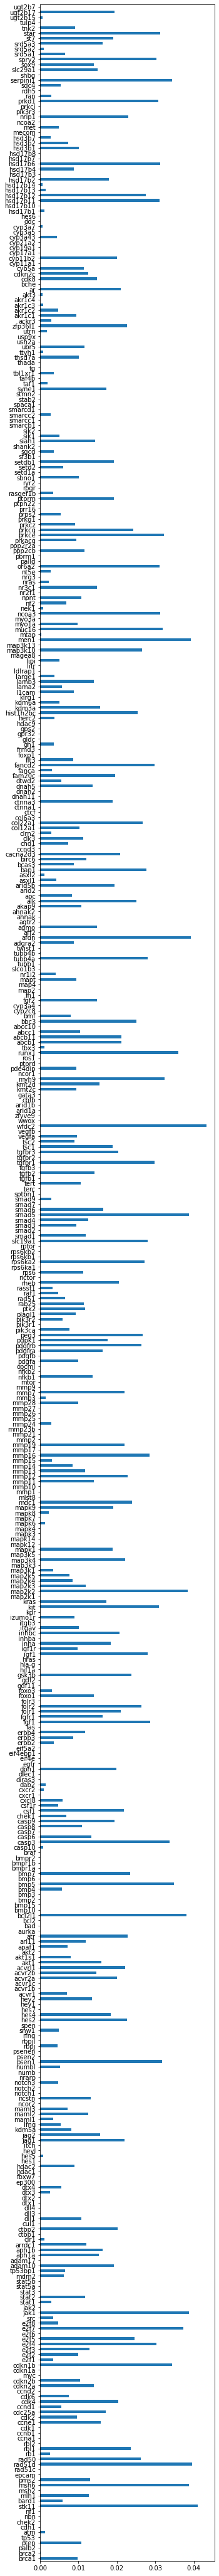

In [45]:
# do the same thing for gene expressions features
plt.figure(figsize=(5, 75))
features_importance = mutual_info_classif(df_gen_expression, target)
pd.Series(features_importance, df_gen_expression.columns).plot(kind='barh')
plt.show()

Also, we may want to plot correlation matrix for

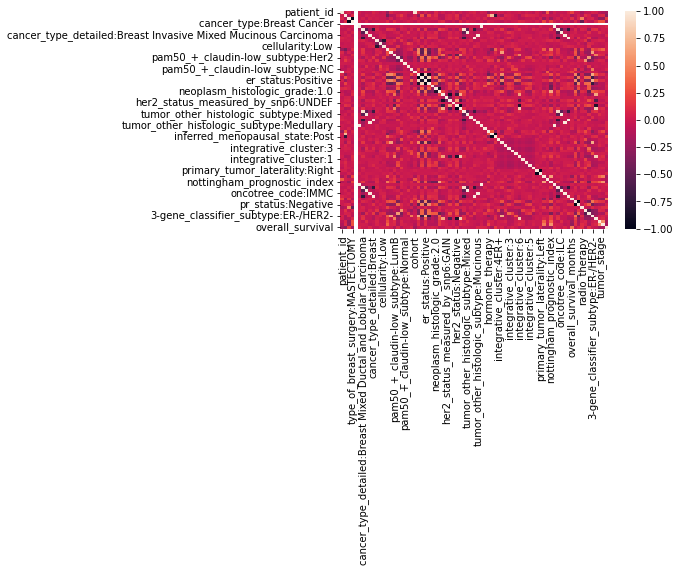

In [90]:
import seaborn as sns

clinical_correlations = pd.concat([encoded_df_clinical, target], axis=1).corr()
sns.heatmap(clinical_correlations)

plt.show()

# Classic Model (25 Points)

In this section, you must implement a classic classification model for clinical, gene expressions, and reduced gene expressions datasets. Using Random Forest is suggested. (minimum acceptable accuracy = 60%)

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV


class classical_models():
    def __init__(self, X_train, X_test, y_train):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.best_params_models_dict = {}

    def hyperparameter_tuning(self, model, random_grid_dic, model_name):
        classifier = RandomizedSearchCV(estimator=model, param_distributions=random_grid_dic, n_iter=1, cv=3, 
        verbose=0, random_state=0, n_jobs=-1)
        classifier.fit(self.X_train, self.y_train.ravel())
        best_params = classifier.best_params_
        self.best_params_models_dict[model_name] = best_params
        return best_params
    
    def random_forest(self):
        random_grid = {'n_estimators': [10*i for i in range(1, 11)],
                    'max_features': ['log2', 'sqrt', None],
                    'max_leaf_nodes': range(5, 10),
                    'max_depth': range(2, 10),
                    'min_samples_split': range(5, 10),
                    'min_samples_leaf': range(0, 4)
                    }
        best_params = self.hyperparameter_tuning(RandomForestClassifier(), random_grid, 'random_forest')
        classifier = RandomForestClassifier(**best_params)
        classifier.fit(self.X_train, self.y_train.ravel())
        y_pred = classifier.predict(self.X_test)
        return y_pred
    
    def extra_tree(self):
        random_grid = {'n_estimators': [10*i for i in range(1, 11)],
            'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ['log2', 'sqrt', None],
            'max_leaf_nodes': range(5, 10),
            'max_depth': range(2, 10),
            'min_samples_split': range(5, 10),
            'min_samples_leaf': range(0, 4)
            }
        best_params = self.hyperparameter_tuning(ExtraTreesClassifier(), random_grid, 'extra_tree')
        classifier = ExtraTreesClassifier(**best_params)
        classifier.fit(self.X_train, self.y_train.ravel())
        y_pred = classifier.predict(self.X_test)
        return y_pred

    def decision_tree(self):
        random_grid = {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ['log2', 'sqrt', None],
            'max_leaf_nodes': range(5, 10),
            'max_depth': range(2, 10),
            'min_samples_split': range(5, 10),
            'min_samples_leaf': range(0, 4)
            }
        best_params = self.hyperparameter_tuning(DecisionTreeClassifier(), random_grid, 'decision_tree')
        classifier = DecisionTreeClassifier(**best_params)
        classifier.fit(self.X_train, self.y_train.ravel())
        y_pred = classifier.predict(self.X_test)
        return y_pred

    def adaboost(self):
        if self.best_params_models_dict['decision_tree']:
            random_grid = {'n_estimators': [10*i for i in range(1, 11)],
                'learning_rate': [0.001*i for i in range(1, 11)],
                }
            best_params = self.hyperparameter_tuning(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(**self.best_params_models_dict['decision_tree'])),
                                                    random_grid, 'adaboost')
            classifier = AdaBoostClassifier(**best_params)
            classifier.fit(self.X_train, self.y_train.ravel())
            y_pred = classifier.predict(self.X_test)
            return y_pred
        else:
            self.decision_tree()


    def svc(self):
        random_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
            'degree': range(1, 10),
            'gamma': ['scale', 'auto']
            }
        best_params = self.hyperparameter_tuning(SVC(), random_grid, 'svc')
        classifier = SVC(**best_params)
        classifier.fit(self.X_train, self.y_train.ravel())
        y_pred = classifier.predict(self.X_test)
        return y_pred

In [132]:
# with reduced gene expression

classical = classical_models(X_train=X_train_reduced, X_test=X_test_reduced, y_train=y_train_reduced)
y_pred_random_forest = classical.random_forest()
y_pred_extra_tree = classical.extra_tree()
y_pred_decision_tree = classical.decision_tree()
y_pred_adaboost = classical.adaboost()
y_pred_svc = classical.svc()

accuracy_score_dict = {'random_forest': accuracy_score(y_pred_random_forest, y_test_reduced),
'extra_tree': accuracy_score(y_pred_extra_tree, y_test_reduced),
'decision_tree': accuracy_score(y_pred_decision_tree, y_test_reduced),
'adaboost': accuracy_score(y_pred_adaboost, y_test_reduced),
'svc': accuracy_score(y_pred_svc, y_test_reduced)}

for model, score in accuracy_score_dict.items():
    print(f'Model: {model}, accuracy: {score:.2f}')
print(classical.best_params_models_dict)

Model: random_forest, accuracy: 0.65
Model: extra_tree, accuracy: 0.63
Model: decision_tree, accuracy: 0.63
Model: adaboost, accuracy: 0.58
Model: svc, accuracy: 0.67
{'random_forest': {'n_estimators': 30, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_leaf_nodes': 8, 'max_features': None, 'max_depth': 2}, 'extra_tree': {'n_estimators': 90, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_leaf_nodes': 6, 'max_features': None, 'max_depth': 8, 'criterion': 'log_loss'}, 'decision_tree': {'min_samples_split': 7, 'min_samples_leaf': 2, 'max_leaf_nodes': 6, 'max_features': 'log2', 'max_depth': 3, 'criterion': 'entropy'}, 'adaboost': {'n_estimators': 50, 'learning_rate': 0.005}, 'svc': {'kernel': 'rbf', 'gamma': 'scale', 'degree': 1}}


In [133]:
# with gene expression

classical = classical_models(X_train=X_train_gene, X_test=X_test_gene, y_train=y_train_gene)
y_pred_random_forest = classical.random_forest()
y_pred_extra_tree = classical.extra_tree()
y_pred_decision_tree = classical.decision_tree()
y_pred_adaboost = classical.adaboost()
y_pred_svc = classical.svc()

accuracy_score_dict = {'random_forest': accuracy_score(y_pred_random_forest, y_test_gene),
'extra_tree': accuracy_score(y_pred_extra_tree, y_test_gene),
'decision_tree': accuracy_score(y_pred_decision_tree, y_test_gene),
'adaboost': accuracy_score(y_pred_adaboost, y_test_gene),
'svc': accuracy_score(y_pred_svc, y_test_gene)}

for model, score in accuracy_score_dict.items():
    print(f'Model: {model}, accuracy: {score:.2f}')
print(classical.best_params_models_dict)

Model: random_forest, accuracy: 0.65
Model: extra_tree, accuracy: 0.61
Model: decision_tree, accuracy: 0.55
Model: adaboost, accuracy: 0.65
Model: svc, accuracy: 0.68
{'random_forest': {'n_estimators': 30, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_leaf_nodes': 8, 'max_features': None, 'max_depth': 2}, 'extra_tree': {'n_estimators': 90, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_leaf_nodes': 6, 'max_features': None, 'max_depth': 8, 'criterion': 'log_loss'}, 'decision_tree': {'min_samples_split': 7, 'min_samples_leaf': 2, 'max_leaf_nodes': 6, 'max_features': 'log2', 'max_depth': 3, 'criterion': 'entropy'}, 'adaboost': {'n_estimators': 50, 'learning_rate': 0.005}, 'svc': {'kernel': 'rbf', 'gamma': 'scale', 'degree': 1}}


In [134]:
# with only clinical features

classical = classical_models(X_train=X_train_clinical, X_test=X_test_clinical, y_train=y_train_clinical)
y_pred_random_forest = classical.random_forest()
y_pred_extra_tree = classical.extra_tree()
y_pred_decision_tree = classical.decision_tree()
y_pred_adaboost = classical.adaboost()
y_pred_svc = classical.svc()

accuracy_score_dict = {'random_forest': accuracy_score(y_pred_random_forest, y_test_clinical),
'extra_tree': accuracy_score(y_pred_extra_tree, y_test_clinical),
'decision_tree': accuracy_score(y_pred_decision_tree, y_test_clinical),
'adaboost': accuracy_score(y_pred_adaboost, y_test_clinical),
'svc': accuracy_score(y_pred_svc, y_test_clinical)}

for model, score in accuracy_score_dict.items():
    print(f'Model: {model}, accuracy: {score:.2f}')
print(classical.best_params_models_dict)

Model: random_forest, accuracy: 0.75
Model: extra_tree, accuracy: 0.78
Model: decision_tree, accuracy: 0.57
Model: adaboost, accuracy: 0.69
Model: svc, accuracy: 0.57
{'random_forest': {'n_estimators': 30, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_leaf_nodes': 8, 'max_features': None, 'max_depth': 2}, 'extra_tree': {'n_estimators': 90, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_leaf_nodes': 6, 'max_features': None, 'max_depth': 8, 'criterion': 'log_loss'}, 'decision_tree': {'min_samples_split': 7, 'min_samples_leaf': 2, 'max_leaf_nodes': 6, 'max_features': 'log2', 'max_depth': 3, 'criterion': 'entropy'}, 'adaboost': {'n_estimators': 50, 'learning_rate': 0.005}, 'svc': {'kernel': 'rbf', 'gamma': 'scale', 'degree': 1}}


# Neural Network (30 Points)

In this section, you must implement a neural network model for clinical, gene expressions and reduced gene expressions datasets. Using the MPL models is suggested. (minimum acceptable accuracy = 60%)

In [135]:
from tensorflow import keras
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(alpha=1e-3,
                     hidden_layer_sizes=(20, 15, 10, 5), random_state=1, max_iter=1000)

clf.fit(X_train_clinical, y_train_clinical.ravel())
y_pred = clf.predict(X_test_clinical)
print(accuracy_score(y_pred, y_test_clinical))

0.7534246575342466


In [136]:
from tensorflow import keras
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(alpha=1e-3,
                     hidden_layer_sizes=(20, 15, 10, 5), random_state=1, max_iter=1000)

clf.fit(X_train_gene, y_train_gene.ravel())
y_pred = clf.predict(X_test_gene)
print(accuracy_score(y_pred, y_test_gene))

0.6255707762557078


In [138]:
from tensorflow import keras
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(alpha=1e-3,
                     hidden_layer_sizes=(15, 10, 5), random_state=1, max_iter=1000)

clf.fit(X_train_reduced, y_train_reduced.ravel())
y_pred = clf.predict(X_test_reduced)
print(accuracy_score(y_pred, y_test_reduced))

0.6210045662100456


# Model Comparison (10 Points)

Compare different models and different datasets (clinical, gene expressions, and gene reduced expressions) and try to explain their differences.

It seems that the clinical data dataset has a large amount of leakage (for example, months of survival after illness) and therefore can have a simpler prediction. Also, the dataset that includes the reduced data of gene expression has lost a large part of the information because it has been reduced by the PCA method and cannot make predictions as much as the complete dataset of gene expression.

In [140]:
pca_reducer.explained_variance_ratio_.sum()

0.4823424055985454

As we can see, 50% of the information is lost by the PCA method, which makes it unable to make a good prediction.